<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/nse_pe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nsepy --q

In [2]:
from nsepy import get_index_pe_history ,get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

nifty_pe = get_index_pe_history(symbol="NIFTY",
                                start=date(2007,1,1),
                                end=date(2022,11,18))

In [4]:
nifty_fut = get_history(symbol="NIFTY",
                        start=date(2007,1,1),
                        end=date(2022,11,18),
                        index=True,
                        futures=False)

In [5]:
data=pd.concat([nifty_fut,nifty_pe],axis=1)

In [6]:
data.to_csv('data.csv')

In [7]:
data.tail(2)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2022-11-17,18358.70,18417.6,18312.95,18343.90,200512910,1.641036e+11,21.83,4.31,1.3
2022-11-18,18382.95,18394.6,18209.80,18307.65,198794846,1.655369e+11,21.79,4.30,1.3


In [8]:
data['earnings']=data['Close']/data['P/E']

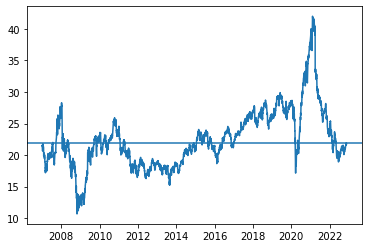

In [9]:
plt.plot(data['P/E'])
plt.axhline(y=data['P/E'].median());

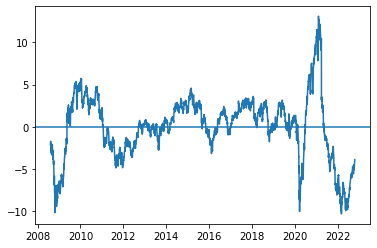

In [10]:
plt.plot(data['P/E']-data['P/E'].rolling(window=400).mean())
plt.axhline(y=0);

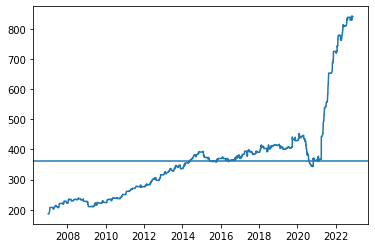

In [11]:
plt.plot(data['earnings'])#-data['earnings'].rolling(window=800).mean())
plt.axhline(y=data['earnings'].median());

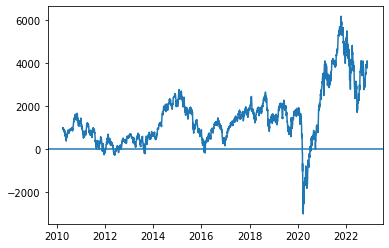

In [12]:
plt.plot(data['Close']-data['Close'].rolling(window=800).mean())
plt.axhline(y=0);

In [13]:
data['Close'].rolling(window=800).mean()[-1]

14335.711312500001

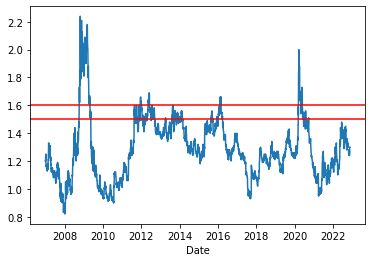

In [14]:
data['Div Yield'].plot()
plt.axhline(y=1.5,color='r');
plt.axhline(y=1.6,color='r');
